In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
heart_disease=pd.read_csv(r"Data\heart_disease_pca.csv")
heart_disease.sample(10)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,num
116,-1.219820,-0.928613,2.025812,-0.744370,0.143022,0.906903,1.659908,0.584449,-0.108463,-0.453499,0
203,-0.298300,-1.321164,-0.873079,-0.457078,-0.827622,0.395515,-1.704846,0.445265,-0.982453,-1.259925,0
48,-0.154018,-4.080277,0.168903,-1.277590,0.642882,0.923102,0.303649,-1.553069,-0.992434,-0.261219,0
244,-0.767021,-0.595026,-0.066830,-0.242616,-2.913205,1.601940,2.070887,0.540820,-1.056847,-0.677959,0
26,-2.084618,-1.485639,-1.499049,-0.493444,-0.187433,0.313928,-1.014713,-0.834890,-0.696294,-0.249399,0
159,0.094090,0.089663,0.174918,-1.256426,-0.970843,-1.137658,-1.301082,-0.197617,-0.935013,-0.650149,0
109,-0.114757,2.395068,-0.236129,0.413279,0.013145,0.201201,-0.403980,-0.659439,0.145361,-1.385516,3
64,1.179724,1.821861,-0.210847,0.048623,-1.448837,-0.617616,0.002618,0.075383,0.007035,-1.217671,2
7,-0.720979,-0.917662,-2.464296,-0.961832,0.359330,1.461242,-0.980593,-0.626516,-0.645141,0.748645,0
226,-1.668130,1.538008,-0.770962,-0.703754,-0.712080,0.016139,0.418824,0.291045,0.060166,-0.500194,0


In [6]:
x=heart_disease.iloc[:,:-1]
y=heart_disease[['num']]

In [7]:
rf=RandomForestClassifier()
rf.fit(x,y)

c:\Users\ALEX STORE\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

C:\Users\ALEX STORE\AppData\Local\Temp\ipykernel_22460\2850138960.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


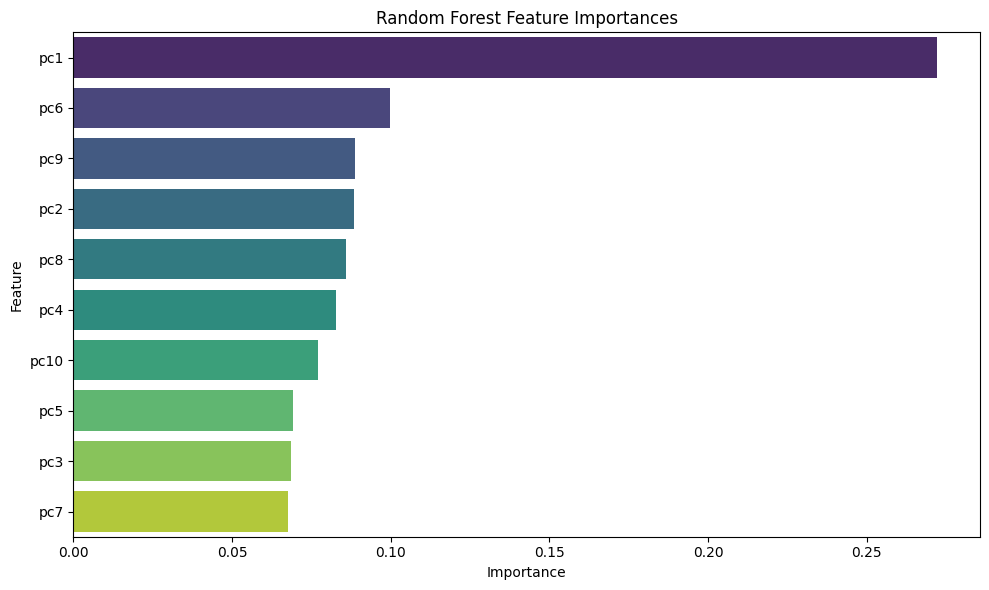

In [ ]:
importances = rf.feature_importances_
feature_names = x.columns 
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

In [12]:

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,  
    eval_metric='logloss'
)
xgb.fit(x,y)

c:\Users\ALEX STORE\AppData\Local\Programs\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

C:\Users\ALEX STORE\AppData\Local\Temp\ipykernel_22460\2767143796.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='rocket')


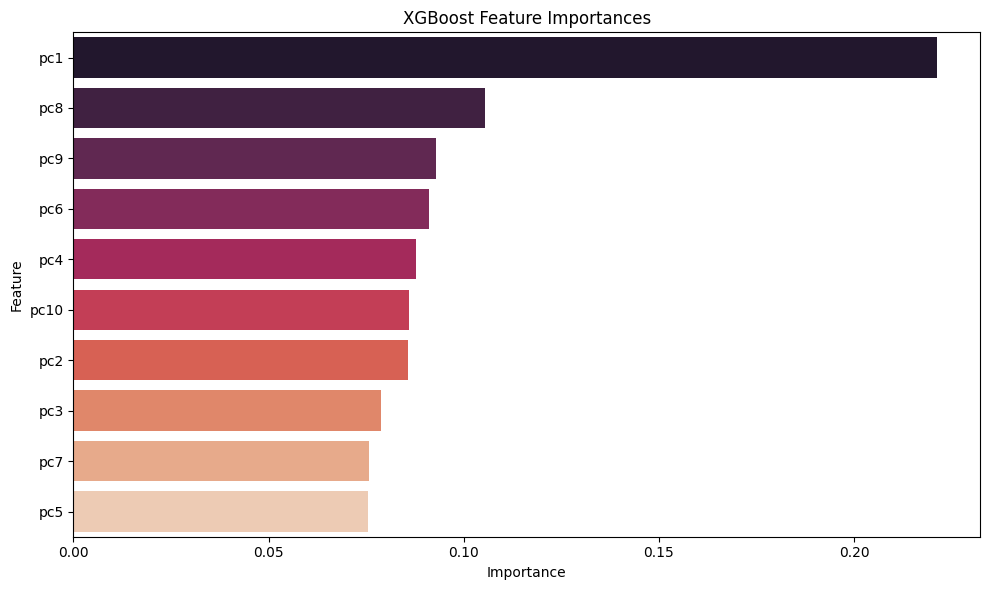

In [13]:

# Get feature importances
importances = xgb.feature_importances_
feature_names = x.columns  # assuming x is a DataFrame

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='rocket')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()


In [29]:
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: RFE for XGBoost and RandomForest
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForest': RandomForestClassifier()
}

selected_features_dict = {}

for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=7)
    rfe.fit(x, y)
    selected = x.columns[rfe.support_]
    selected_features_dict[name] = set(selected)
    print(f"{name} selected features:")
    print(selected.tolist())
    print('-' * 40)

# Step 2: Chi-Square feature selection
X_scaled = MinMaxScaler().fit_transform(x)  # Chi2 requires non-negative values
chi_selector = SelectKBest(score_func=chi2, k=7)
chi_selector.fit(X_scaled, y)
chi_features = set(x.columns[chi_selector.get_support()])

selected_features_dict['Chi2'] = chi_features
print("Chi-Square selected features:")
print(list(chi_features))
print('-' * 40)

# Step 3: Compare all three sets
set_xgb = selected_features_dict['XGBoost']
set_rf = selected_features_dict['RandomForest']
set_chi = selected_features_dict['Chi2']

# Pairwise intersections
print("✅ Common features in all three:", list(set_xgb & set_rf & set_chi))
print("🟢 XGBoost only:", list(set_xgb - set_rf - set_chi))
print("🔵 RandomForest only:", list(set_rf - set_xgb - set_chi))
print("🟡 Chi-Square only:", list(set_chi - set_xgb - set_rf))


print("🔁 XGB ∩ RF:", list(set_xgb & set_rf))
print("🔁 XGB ∩ Chi2:", list(set_xgb & set_chi))
print("🔁 RF ∩ Chi2:", list(set_rf & set_chi))


XGBoost selected features:
['pc1', 'pc2', 'pc4', 'pc6', 'pc8', 'pc9', 'pc10']
----------------------------------------
RandomForest selected features:
['pc1', 'pc2', 'pc4', 'pc6', 'pc8', 'pc9', 'pc10']
----------------------------------------
Chi-Square selected features:
['pc5', 'pc6', 'pc2', 'pc8', 'pc1', 'pc9', 'pc4']
----------------------------------------
✅ Common features in all three: ['pc6', 'pc2', 'pc8', 'pc9', 'pc1', 'pc4']
🟢 XGBoost only: []
🔵 RandomForest only: []
🟡 Chi-Square only: ['pc5']
🔁 XGB ∩ RF: ['pc6', 'pc2', 'pc8', 'pc9', 'pc1', 'pc4', 'pc10']
🔁 XGB ∩ Chi2: ['pc6', 'pc2', 'pc8', 'pc9', 'pc1', 'pc4']
🔁 RF ∩ Chi2: ['pc6', 'pc2', 'pc8', 'pc9', 'pc1', 'pc4']


In [36]:
heart_disease_selected_feature=heart_disease[['pc6', 'pc2', 'pc8', 'pc9', 'pc1', 'pc4','num']]
heart_disease_selected_feature.to_csv(r"Data/heart_disease_selected_feature.csv")